In [1]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from func_analises import (
    maiores_ocorrencias_por_genero,
    grafico_entradas_por_hospital,
    segmentacao_por_entrada_em_hospitais,
)


<class 'module'>


In [3]:
diretorio_dados = "healthcare_dataset.csv"
df = pd.read_csv(diretorio_dados, encoding="utf-8", sep=",", decimal=".")

# Informações base do DataFrame

In [4]:
print("Primeiras cinco linhas da tabela:")
print(df.head())
print("\nUltimas cinco linhas da tabela:")
print(df.tail())
print("\nDescrição dos dados da tabela:")
print(df.describe())
print("\nInformação sobre as linhas e colunas das tabelas:")
print(df.info())

Primeiras cinco linhas da tabela:
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   M

In [5]:
print(f"O dataframe contém {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataframe contém 55500 linhas e 15 colunas.


In [6]:
# Verificando a quantidade de linhas vazias para cada coluna
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [7]:
# Verificando valores e quantidade de todas as colunas do DataFrame
colunas = df.columns.to_list()
for nome_coluna in colunas:
    print(f"{df[nome_coluna].value_counts()} \n\n")

Name
DAvId muNoZ         3
Cody BurNett        2
roDNEy Shaw         2
grEGorY smitH       2
MelisSA coOk        2
                   ..
sHEila MCmaHoN      1
rACHEL Gillespie    1
sArAh joHNSON       1
aNgEL PEtersON      1
JeSse jOhNSON       1
Name: count, Length: 49992, dtype: int64 


Age
38    897
37    893
57    887
34    864
80    864
     ... 
88     25
16     24
14     18
13     14
89      8
Name: count, Length: 77, dtype: int64 


Gender
Male      27774
Female    27726
Name: count, dtype: int64 


Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64 


Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64 


Date of Admission
2024-03-16    50
2022-07-24    49
2020-10-22    49
2021-12-28    48
2021-01-03    48
              ..
2023-04-12    14
2022-05-28    14
2022-05-23    13
2019-0

# Tratamento/Conversão de dados

In [8]:
# Convertendo as colunas referente a datas de objetos para datas
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [9]:
# Transformando os nomes em minúsculo e verficando
df["Name"] = df["Name"].str.lower()
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Dataframes e gráficos

In [10]:
# Ocorrências de condição médica segmentado pelo sexo feminino
maiores_ocorrencias_feminina = maiores_ocorrencias_por_genero(df, "Female")
df_ocorrencias_feminina = maiores_ocorrencias_feminina.reset_index(name="Count")
df_ocorrencias_feminina

,Medical Condition,Gender,Count
0,Arthritis,Female,4686
1,Diabetes,Female,4651
2,Obesity,Female,4622
3,Hypertension,Female,4612
4,Cancer,Female,4602
5,Asthma,Female,4553


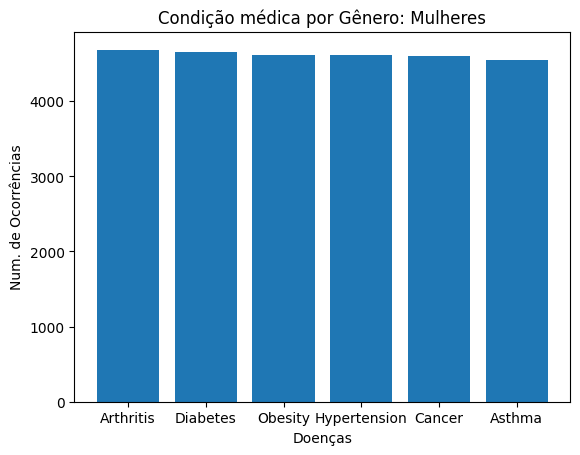

In [11]:
plt.bar(df_ocorrencias_feminina["Medical Condition"], df_ocorrencias_feminina["Count"])
plt.title(f"Condição médica por Gênero: Mulheres")
plt.xlabel("Doenças")
plt.ylabel("Num. de Ocorrências")
plt.show()

In [12]:
# Dataframe: Ocorrências de condição médica segmentado pelo sexo masculino
maiores_ocorrencias_masculina = maiores_ocorrencias_por_genero(df, "Male")
df_ocorrencias_masculina = maiores_ocorrencias_masculina.reset_index(name="Count")
df_ocorrencias_masculina

,Medical Condition,Gender,Count
0,Diabetes,Male,4653
1,Hypertension,Male,4633
2,Asthma,Male,4632
3,Cancer,Male,4625
4,Arthritis,Male,4622
5,Obesity,Male,4609


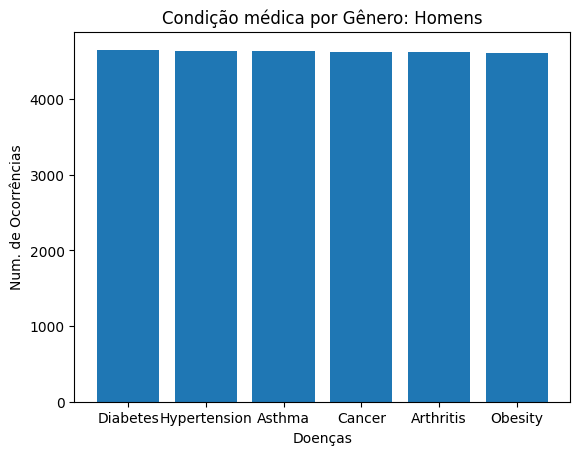

In [13]:
# Gráfico de barras: Ocorrências de condição médica segmentado pelo sexo masculino
plt.bar(
    df_ocorrencias_masculina["Medical Condition"], df_ocorrencias_masculina["Count"]
)
plt.title(f"Condição médica por Gênero: Homens")
plt.xlabel("Doenças")
plt.ylabel("Num. de Ocorrências")
plt.show()

In [14]:
# Dataframe: Entrada em hospitais do tipo "Urgent"
segmentacao_por_entrada_em_hospitais(df, pd, admissao="Urgent", numero_indicadores=5)

,Admission Type,Hospital,count
0,Urgent,Ltd Smith,16
1,Urgent,Inc Smith,16
2,Urgent,LLC Smith,15
3,Urgent,Smith Inc,14
4,Urgent,Group Johnson,13


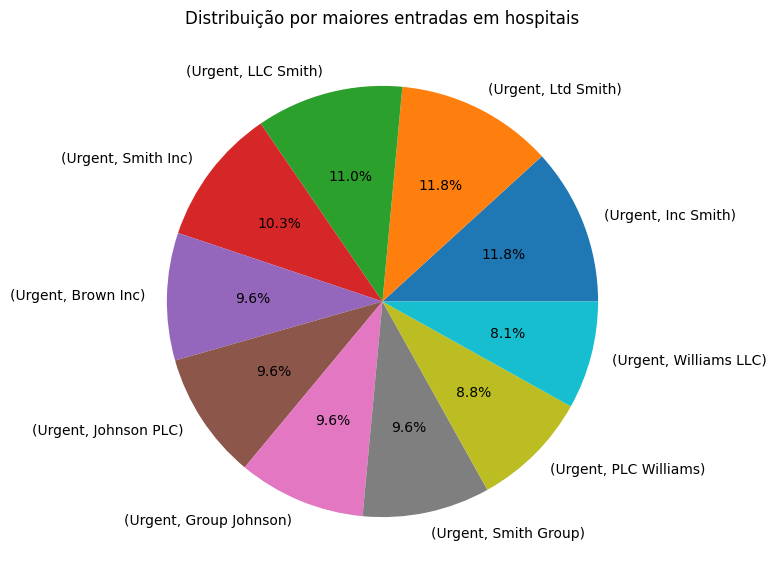

In [15]:
# Gráfico de pizza: Entrada em hospitais do tipo "Urgent"
grafico_entradas_por_hospital(df, admissao="Urgent", numero_indicadores=10)

In [16]:
# Dataframe: Entrada em hospitais do tipo "Emergency"
segmentacao_por_entrada_em_hospitais(df, pd, admissao="Emergency", numero_indicadores=5)

,Admission Type,Hospital,count
14794,Emergency,LLC Smith,19
14795,Emergency,Smith Ltd,14
14796,Emergency,Smith PLC,12
14797,Emergency,Johnson PLC,12
14798,Emergency,Inc Jones,12


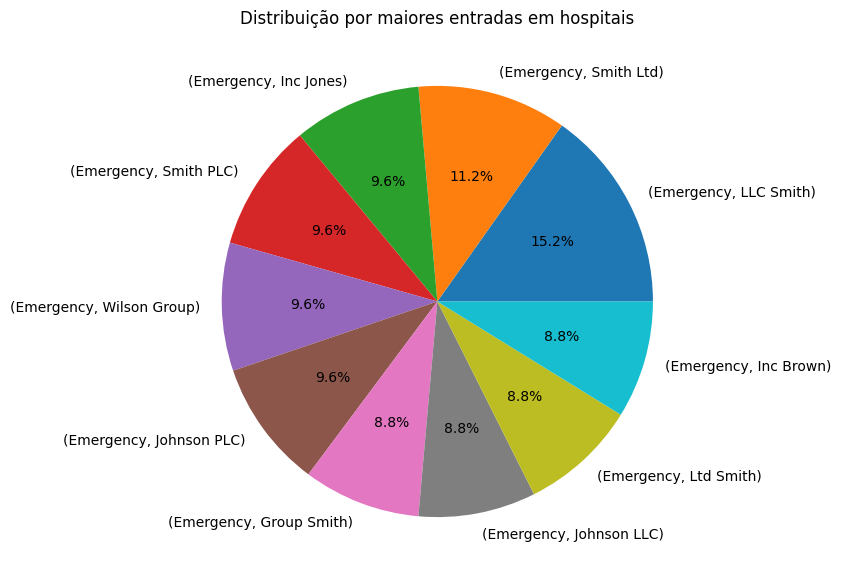

In [17]:
# Gráfico de pizza: Entrada em hospitais do tipo "Emergency"
grafico_entradas_por_hospital(df, admissao="Emergency", numero_indicadores=10)

In [18]:
# Dataframe: Entrada em hospitais do tipo "Elective"
segmentacao_por_entrada_em_hospitais(df, pd, admissao="Elective", numero_indicadores=5)

,Admission Type,Hospital,count
29299,Elective,Johnson Inc,17
29300,Elective,Brown PLC,16
29301,Elective,PLC Smith,16
29302,Elective,Smith LLC,15
29303,Elective,Smith PLC,14


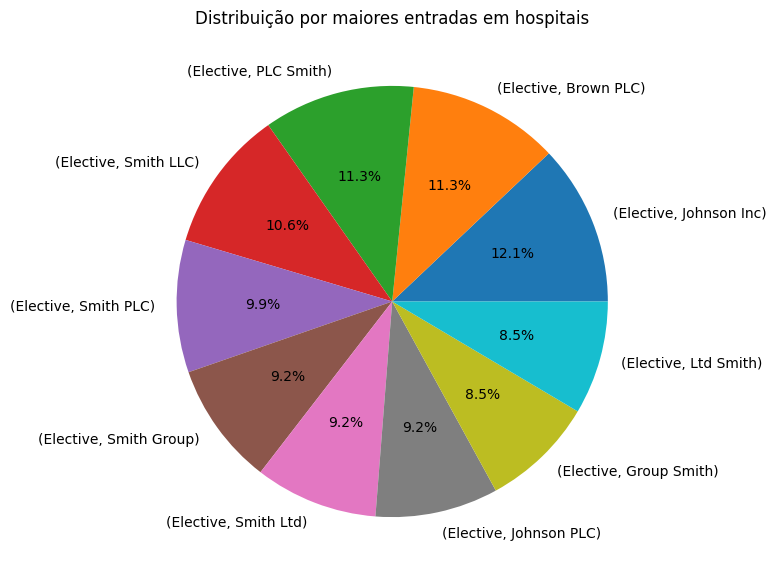

In [19]:
# Gráfico de pizza: Entrada em hospitais do tipo "Elective"
grafico_entradas_por_hospital(df, admissao="Elective", numero_indicadores=10)

In [20]:
# Dataframe: quantidade e medicação utilizada por tipo de entrada
contagem_medicacao_por_entrada = (
    df[["Medication", "Admission Type"]]
    .value_counts()
    .reset_index(name="Counts")
    .sort_values(
        by=["Medication", "Counts"], ascending=[True, False], ignore_index=True
    )
)
contagem_medicacao_por_entrada

,Medication,Admission Type,Counts
0,Aspirin,Elective,3784
1,Aspirin,Urgent,3686
2,Aspirin,Emergency,3624
3,Ibuprofen,Urgent,3739
4,Ibuprofen,Elective,3734
5,Ibuprofen,Emergency,3654
6,Lipitor,Urgent,3807
7,Lipitor,Elective,3667
8,Lipitor,Emergency,3666
9,Paracetamol,Elective,3737


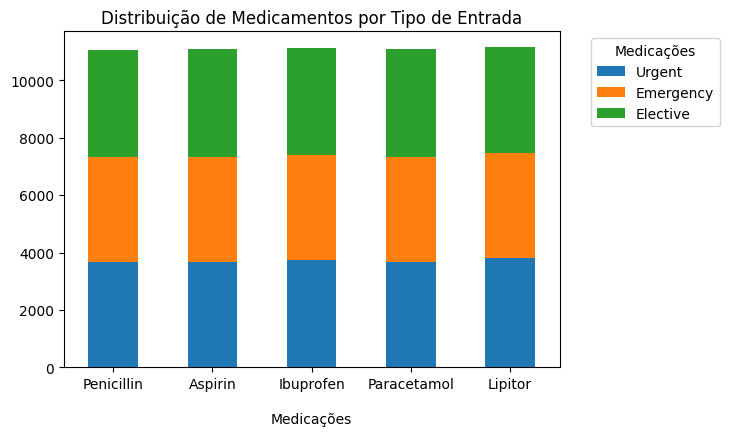

In [21]:
# Gráfico: quantidade e medicação utilizada por tipo de entrada
medicacoes_utilizadas = set(contagem_medicacao_por_entrada["Medication"].tolist())
tipos_de_entradas = set(contagem_medicacao_por_entrada["Admission Type"].tolist())
tabela_agrupada = {
    entrada: {medicacao: 0 for medicacao in medicacoes_utilizadas}
    for entrada in tipos_de_entradas
}

for _, row in contagem_medicacao_por_entrada.iterrows():
    entrada = row["Admission Type"]
    medicacao = row["Medication"]
    contagem = row["Counts"]
    tabela_agrupada[entrada][medicacao] = contagem

dataframe = pd.DataFrame(tabela_agrupada)
dataframe.plot(kind="bar", stacked=True)
plt.title("Distribuição de Medicamentos por Tipo de Entrada")
plt.xlabel("Medicações", labelpad=15)
plt.subplots_adjust(top=1, bottom=0.3)
plt.xticks(rotation=360)
plt.legend(title="Medicações", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.show()

In [22]:
# Dataframe: relação de cobrança acumulada por hospitais
maiores_cobrancas_acumuladas_por_hospitais = (
    df.groupby("Hospital")["Billing Amount"]
    .sum()
    .reset_index()
    .nlargest(10, "Billing Amount")
)
maiores_cobrancas_acumuladas_por_hospitais

,Hospital,Billing Amount
14869,Johnson PLC,1.084203e+06
16879,LLC Smith,1.030190e+06
28908,Smith PLC,1.029424e+06
18590,Ltd Smith,1.003366e+06
28888,Smith Ltd,9.700359e+05
14833,Johnson Inc,9.411175e+05
10883,Group Smith,9.029758e+05
13753,Inc Brown,8.907565e+05
16662,LLC Johnson,8.164384e+05
28850,Smith Group,8.066313e+05


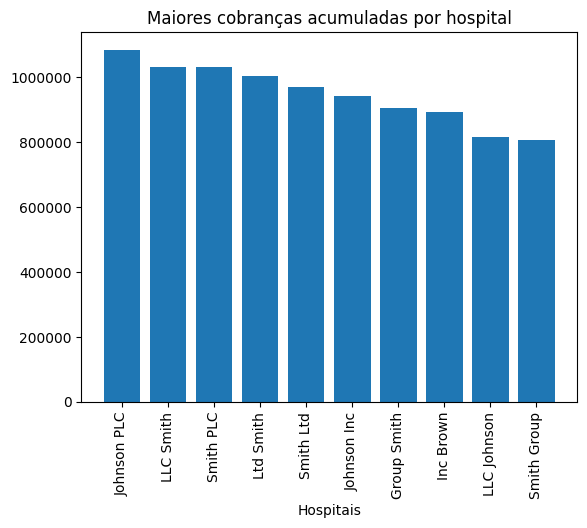

In [23]:
# Gráfico: relação de cobrança acumulada por hospitais
plt.bar(
    maiores_cobrancas_acumuladas_por_hospitais["Hospital"],
    maiores_cobrancas_acumuladas_por_hospitais["Billing Amount"].astype(int),
)
plt.title(label="Maiores cobranças acumuladas por hospital")
plt.xlabel(xlabel="Hospitais")
plt.xticks(rotation=90)
plt.ticklabel_format(style="plain", axis="y")
plt.show()